# Heart Stroke Prediction

This data science project aims to predict the likelihood of a patient experiencing a stroke based on various input parameters such as gender, age, presence of diseases, and smoking status. The dataset provides relevant information about each patient, enabling the development of a predictive model.

## Dataset Information
The dataset used in this project contains information necessary to predict the occurrence of a stroke. Each row in the dataset represents a patient, and the dataset includes the following attributes:

1. id: Unique identifier

2. gender: "Male", "Female", or "Other"

3. age: Age of the patient

4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6. ever_married: "No" or "Yes"

7. work_type: "Children", "Govt_job", "Never_worked", "Private", or "Self-employed"

8. Residence_type: "Rural" or "Urban"

9. avg_glucose_level: Average glucose level in the blood

10. bmi: Body mass index

11. smoking_status: "Formerly smoked", "Never smoked", "Smokes", or "Unknown"

12. stroke: 1 if the patient had a stroke, 0 if not

## Context
According to the World Health Organization (WHO), stroke is the second leading cause of death worldwide, responsible for approximately 11% of total deaths. This project aims to leverage machine learning techniques to build a predictive model that can identify individuals at risk of stroke based on their demographic and health-related features. By detecting high-risk individuals early, appropriate preventive measures can be taken to reduce the incidence and impact of stroke.

To enhance the accuracy of the stroke prediction model, the dataset will be analyzed and processed using various data science methodologies and algorithms.


In [113]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [68]:
#Loading the dataset
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [69]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Preprocessing

In [70]:
# removing unneccesiory column/feature "id"
df.drop("id",axis=1,inplace=True)

In [71]:
#descriptive Statistics of my dataset
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [72]:
# structure of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [73]:
df["age"].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

In [74]:
# checking the null value in my dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [75]:
#replace the missing value with the most frequent value
df["bmi"].fillna(df["bmi"].mode()[0],inplace=True)

In [76]:
# value count for all the features
for i in df.columns:
    print(f"name {i} {df[i].value_counts()} \n")

name gender Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

name age 78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64 

name hypertension 0    4612
1     498
Name: hypertension, dtype: int64 

name heart_disease 0    4834
1     276
Name: heart_disease, dtype: int64 

name ever_married Yes    3353
No     1757
Name: ever_married, dtype: int64 

name work_type Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

name Residence_type Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

name avg_glucose_level 93.88     6
83.16     5
91.85     5
91.68     5
73.00     5
         ..
162.14    1
111.77    1
90.91     1
103.50    1
88.02     1
Name: avg_glucose_level, Length: 3979, dtype: int64 

name bmi 28.7    242
28.4     38
26.7     37
27

In [77]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [78]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Replacing the values in columns with numerical values
- Residence Type: Urban = 1, Rural = 0
- Smoking Status: formerly smoked = 1, never smoked = 2, smokes = 3, Unknown = 0
-   Ever_Maried : Yes = 1, No = 0
- Gender : Male = 1, Female = 0, Other = 2
- Work Type : Private = 0, Self-employed = 1, children = 2, Govt_job = 3, Never_worked = 4


In [79]:
df["ever_married"].replace({"Yes":1,"No":0},inplace=True)
df["gender"].replace({"Male":1,"Female":0},inplace=True)
df["Residence_type"].replace({"Urban":1,"Rural":0},inplace=True)
df["smoking_status"].replace({"formerly smoked":0,"never smoked":1,"smokes":2,"Unknown":3},inplace=True)
df["work_type"].replace({"Private":0,"Self-employed":1,"children":2,"Govt_job":3,"Never_worked":4},inplace=True)

In [80]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,61.0,0,0,1,1,0,202.21,28.7,1,1
2,1,80.0,0,1,1,0,0,105.92,32.5,1,1
3,0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,0,79.0,1,0,1,1,0,174.12,24.0,1,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 439.3+ KB


In [82]:
df["gender"]=df["gender"].replace("Other")
df["gender"]=df["gender"].astype(int)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(1), int64(7)
memory usage: 419.3 KB


## Exploratory Data Analysis

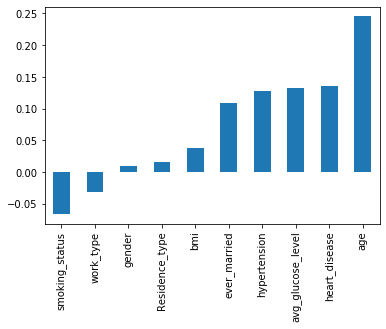

In [84]:
# finding the correlation between the variables
df.corr()["stroke"][:-1].sort_values().plot(kind="bar")

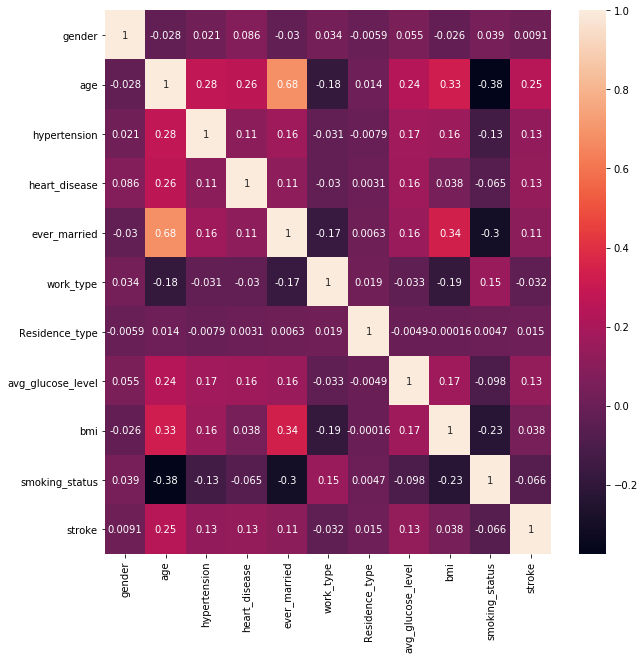

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

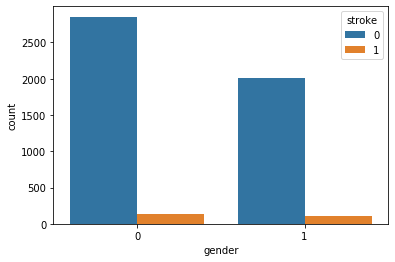

In [87]:
# visualisation
sns.countplot(x="gender",data=df,hue="stroke")

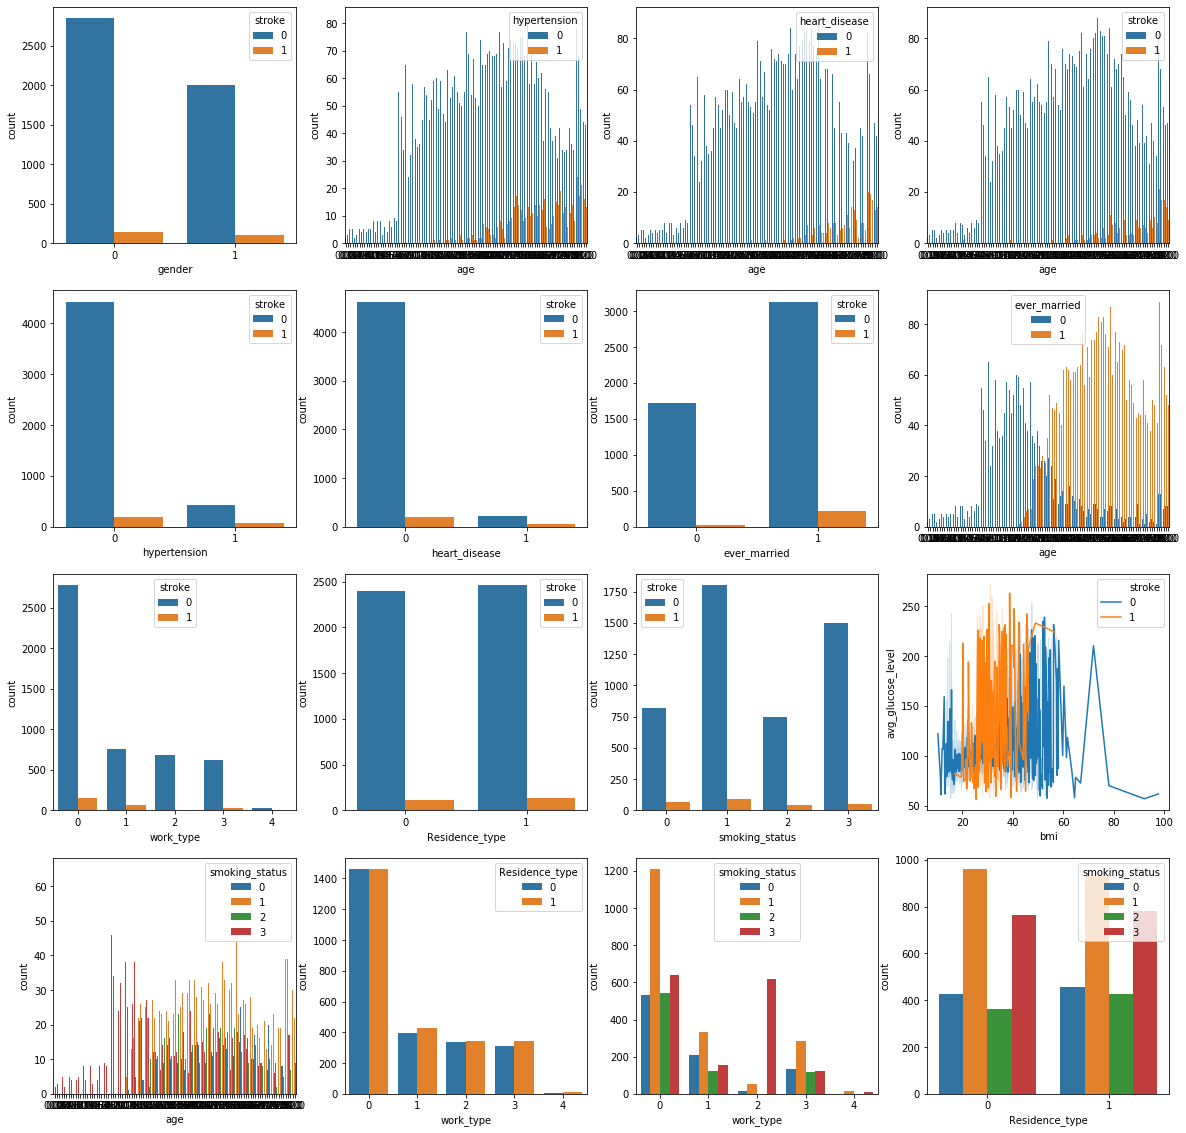

In [97]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])


# Spliting the data


In [96]:
X=df.drop("stroke",axis=1)
y=df["stroke"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [101]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#logistic regression

In [103]:
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression()

In [104]:
LogReg.score(X_test,y_test)

0.943094250148192

In [105]:
y_pred_logReg=LogReg.predict(X_test)

In [109]:
def model_evaluate(name,y_true,y_pred):
    print(f"--------------{name}---------------")
    print("Confusion Matrix:",confusion_matrix(y_true,y_pred))
    print("Classification Report:",classification_report(y_true,y_pred))
    print("Accuracy score:",accuracy_score(y_true,y_pred))

In [114]:
model_evaluate("Logistic Regression:",y_test,y_pred_logReg)

--------------Logistic Regression:---------------
Confusion Matrix: [[1591    0]
 [  96    0]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687

Accuracy score: 0.943094250148192


In [124]:
from ml_utility import plot_confusion_metrix

Confusion Matrix, Without Normalisation


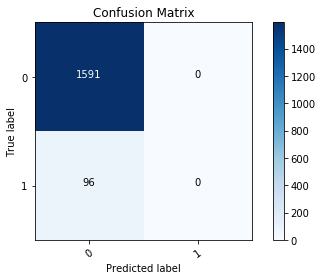

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687

Accuracy of the model:  0.943094250148192


In [128]:
plot_confusion_metrix(y_test, y_pred_logReg, [0, 1])


In [117]:
svc=SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.943094250148192

In [118]:
y_pred_svc=svc.predict(X_test)

In [119]:
model_evaluate("Support vector machine:",y_test,y_pred_svc)

--------------Support vector machine:---------------
Confusion Matrix: [[1591    0]
 [  96    0]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687

Accuracy score: 0.943094250148192


In [121]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)
y_pred_dt=dt.predict(X_test)
model_evaluate("Decision Tree:",y_test,y_pred_dt)

--------------Decision Tree:---------------
Confusion Matrix: [[1508   83]
 [  79   17]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1591
           1       0.17      0.18      0.17        96

    accuracy                           0.90      1687
   macro avg       0.56      0.56      0.56      1687
weighted avg       0.91      0.90      0.90      1687

Accuracy score: 0.9039715471250741


In [122]:
rf=DecisionTreeClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
y_pred_rf=rf.predict(X_test)
model_evaluate("Random Forest:",y_test,y_pred_rf)

--------------Random Forest:---------------
Confusion Matrix: [[1504   87]
 [  80   16]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1591
           1       0.16      0.17      0.16        96

    accuracy                           0.90      1687
   macro avg       0.55      0.56      0.55      1687
weighted avg       0.90      0.90      0.90      1687

Accuracy score: 0.9010077059869591


In [123]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
y_pred_knn=knn.predict(X_test)
model_evaluate("K Nearest Neighbores:",y_test,y_pred_knn)

--------------K Nearest Neighbores:---------------
Confusion Matrix: [[1588    3]
 [  95    1]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.25      0.01      0.02        96

    accuracy                           0.94      1687
   macro avg       0.60      0.50      0.50      1687
weighted avg       0.90      0.94      0.92      1687

Accuracy score: 0.941908713692946
